In [1]:
from IPython.core.display import display, HTML
display(HTML('<style>.container { width:80% !important; }</style>'))

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from pylab import meshgrid, cm, contour,clabel,colorbar,axis,title,show
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.pyplot import figure

In [15]:
El = 1
Ej = 165*El

# Potential function: Plotting the Hamiltonian of the 0-π Qubit that varies with Θ and Φ
def potential(flux_ext, theta, phi):
    return -2*Ej*np.cos(theta)*np.cos(phi - flux_ext/2)+El*(phi**2)+2*Ej
def plot_potential():
    #Coefficients and constants
    flux_ext = 0.5*2*np.pi
    theta_array = np.linspace(-np.pi/2, 3*np.pi/2, 1000)
    phi_array = np.linspace(-5*np.pi, 5*np.pi, 8000)
    PHI, THETA= meshgrid(phi_array, theta_array)
    V = potential(flux_ext, THETA, PHI)

    # Plot the potential in 3-d graph 
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(PHI, THETA, V, cmap=cm.Purples_r, linewidth=0, antialiased=False)
    cset = ax.contourf(PHI, THETA, V, zdir='z', offset=np.min(V), cmap=cm.Greens_r)

    plt.title('V = -2Ejcos(\u03F4)cos(\u03A6-\u03C6/2)+El$\u03A6^{2}$+2Ej', family = 'serif')
    plt.xticks(np.linspace(-4*np.pi, 4*np.pi, 3), ('-4π', '0', '4π'))
    plt.yticks(np.linspace(0, np.pi, 2), ('0', 'π'))

    plt.gca().zaxis.set_major_locator(plt.NullLocator())
    ax.set_xlabel('\u03A6', family = 'serif')
    ax.set_ylabel('\u03F4', family = 'serif')
    ax.set_zlabel('V(potential)', family = 'serif')
    plt.show()
def plot_potential_flux():
    # V has 1000 rows, 8000 columns
    # plot against charge noise
    FLUX = np.linspace(-1.0, 1.0, 101)
    POTENTIAL = np.zeros((len(FLUX), 1000, 8000))
    xmin = [float for i in range (len(FLUX))]
    ymin = [float for i in range (len(FLUX))]
    Vmin = [[float for i in range(1)] for i in range (len(FLUX))]
    xmax = [float for i in range (len(FLUX))]
    ymax = [float for i in range (len(FLUX))]
    Vmax = [[float for i in range(1)] for i in range (len(FLUX))]



    for i in range (0, len(FLUX)):
        flux_ext = 2*np.pi*FLUX[i]
        POTENTIAL[i] = potential(flux_ext, THETA, PHI)
        xmin[i], ymin[i] = np.unravel_index(np.argmin(POTENTIAL[i]), POTENTIAL[i].shape)
        Vmin[i] = POTENTIAL[i].min()
        xmax[i], ymax[i] = np.unravel_index(np.argmax(POTENTIAL[i]), POTENTIAL[i].shape)
        Vmax[i] = POTENTIAL[i].max()
    fig = plt.figure()
    plt.plot(FLUX, Vmin)
    plt.title('Minimum possible value of Potential based on Flux')
    plt.xlabel('flux')
    plt.ylabel('potential')
    plt.show()

    fig = plt.figure()
    plt.plot(FLUX, Vmax)
    plt.title('Maximum possible value of Potential based on Flux')
    plt.xlabel('flux')
    plt.ylabel('potential')
    plt.show()

<IPython.core.display.Javascript object>


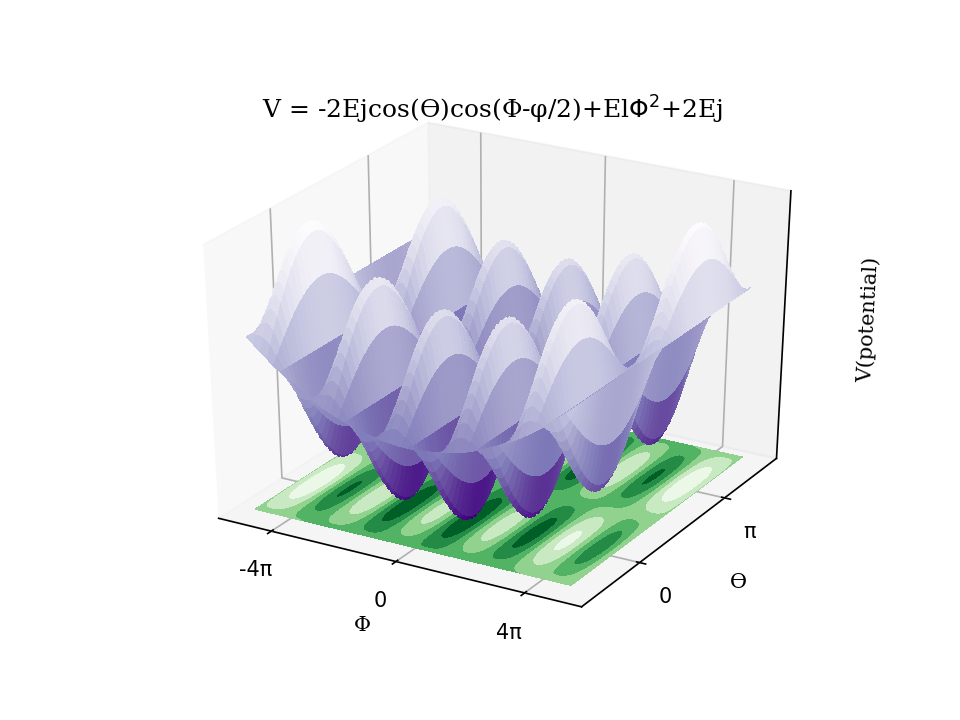

In [16]:
plot_potential()

<IPython.core.display.Javascript object>


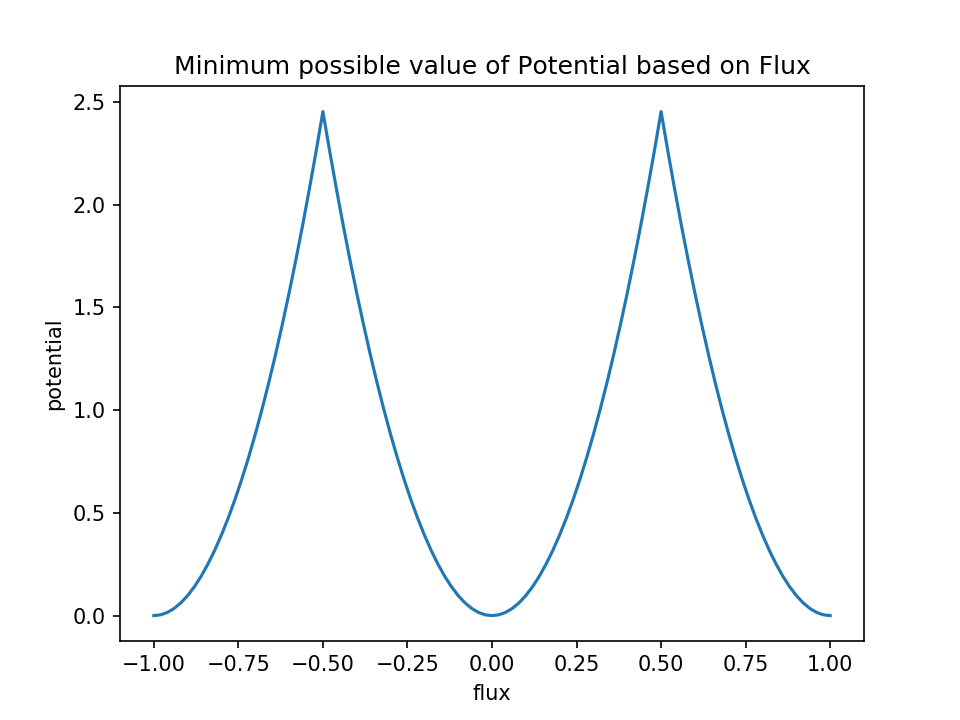

<IPython.core.display.Javascript object>


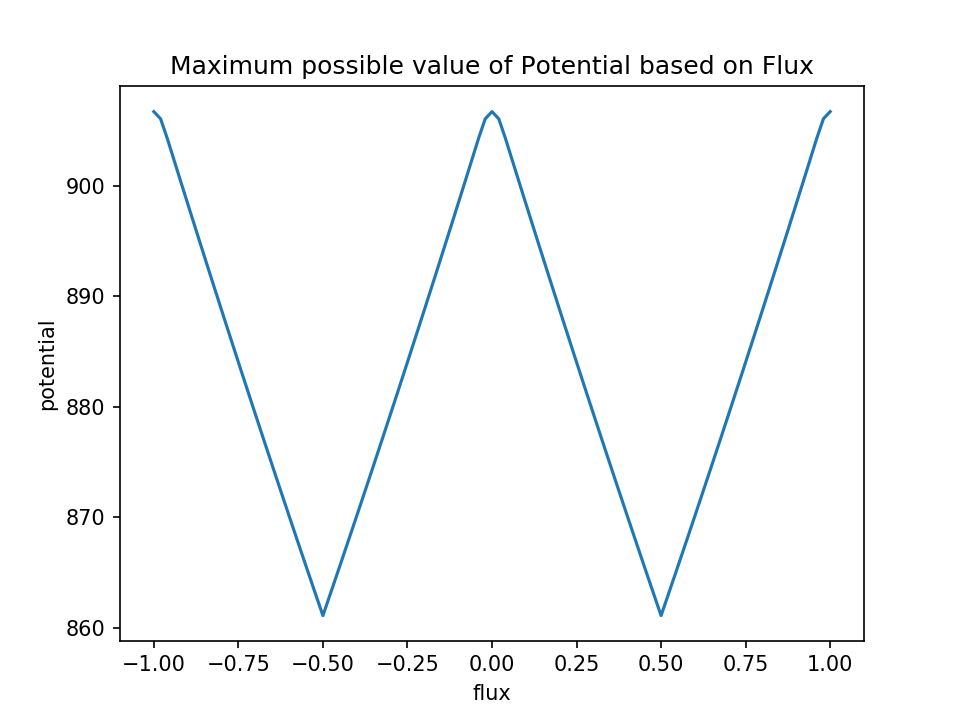

In [12]:
plot_potential_flux()